In [1]:
# 载入此项目所需要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# 让结果在notebook中显示
%matplotlib inline

In [2]:
#载入数据集
train_data = pd.read_csv('train.csv',parse_dates=[2], low_memory=False)
test_data = pd.read_csv('test.csv',parse_dates=[3], low_memory=False)
store_data = pd.read_csv('store.csv', low_memory=False)

print ("Train dataset has {} data points with {} variables each.".format(*train_data.shape))
print ("Train dataset has {} data points with {} variables each.".format(*test_data.shape))
print ("Train dataset has {} data points with {} variables each.".format(*store_data.shape))

Train dataset has 1017209 data points with 9 variables each.
Train dataset has 41088 data points with 8 variables each.
Train dataset has 1115 data points with 10 variables each.


In [3]:
#随机抽取10条train_data数据查看
train_data.sample(n=10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
144790,956,2,2015-03-24,2660,441,1,0,0,0
533637,338,1,2014-03-10,5798,600,1,0,0,0
480423,644,7,2014-04-27,0,0,0,0,0,0
666467,483,1,2013-11-11,4656,693,1,0,0,0
199436,967,2,2015-02-03,10412,996,1,1,0,0
221843,1074,3,2015-01-14,5759,545,1,1,0,0
986078,89,1,2013-01-28,5526,628,1,0,0,0
267898,796,5,2014-11-28,9140,780,1,1,0,0
351552,209,6,2014-08-30,6078,594,1,0,0,0
326891,899,5,2014-09-26,4515,524,1,0,0,0


In [4]:
#随机抽取10条test_data数据查看
test_data.sample(n=10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
7761,7762,75,2,2015-09-08,1.0,0,0,0
28576,28577,426,6,2015-08-15,1.0,0,0,0
8877,8878,413,1,2015-09-07,1.0,0,0,1
10450,10451,233,6,2015-09-05,1.0,0,0,0
23253,23254,186,5,2015-08-21,1.0,1,0,1
25345,25346,675,3,2015-08-19,1.0,1,0,0
23996,23997,39,4,2015-08-20,1.0,1,0,0
2501,2502,1028,2,2015-09-15,1.0,1,0,0
12189,12190,268,4,2015-09-03,1.0,1,0,0
1727,1728,22,2,2015-09-15,1.0,1,0,0


In [5]:
#随机抽取10条store_data数据查看
store_data.sample(n=10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
368,369,d,c,5870.0,4.0,2014.0,0,NaN,NaN,NaN
1023,1024,c,c,1990.0,1.0,2012.0,0,NaN,NaN,NaN
184,185,d,c,1860.0,5.0,2015.0,0,NaN,NaN,NaN
724,725,d,c,17540.0,6.0,2012.0,0,NaN,NaN,NaN
810,811,a,a,410.0,9.0,2012.0,0,NaN,NaN,NaN
730,731,a,a,15270.0,NaN,NaN,1,10.0,2014.0,"Jan,Apr,Jul,Oct"
401,402,c,c,5830.0,9.0,2011.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
274,275,d,a,300.0,5.0,2014.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
1055,1056,d,c,5350.0,NaN,NaN,1,40.0,2012.0,"Jan,Apr,Jul,Oct"
650,651,a,a,200.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
#从数据集中查看NaN值并进行统计
display(train_data.isnull().sum(),
        test_data.isnull().sum(),
        store_data.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

可以看到，train_data中没有NaN值，但是否存在异常值?

In [7]:
train_data['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [8]:
#显示已经关闭的店铺数据
train_data[(train_data.Open == 0)].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


In [9]:
#显示未关闭但销售额为0的数据
train_data[(train_data['Open'] != 0) & (train_data['Sales'] == 0)].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
86825,971,5,2015-05-15,0,0,1,0,0,1
142278,674,4,2015-03-26,0,0,1,0,0,0
196938,699,4,2015-02-05,0,0,1,1,0,0
322053,708,3,2014-10-01,0,0,1,1,0,0
330176,357,1,2014-09-22,0,0,1,0,0,0


In [10]:
#统计train_data中关闭的商店数量
closed_store = train_data[train_data['Open'] == 0]['Open']

#统计train_data中未关闭但销售额为0的商店数量
zero_sales = train_data[(train_data['Open'] != 0) & (train_data['Sales'] == 0)]

print (closed_store.count(),' ',zero_sales['Open'].count())

#从train_data中剔除关闭的商店和异常数据
new_train_data = train_data[(train_data['Open'] != 0) & (train_data['Sales'] != 0)]
print ("New train dataset has {} data points with {} variables each.".format(*new_train_data.shape))

172817   54
New train dataset has 844338 data points with 9 variables each.


In [11]:
#查看stroe_data中CompetitionDistance系列出现的NaN值

from IPython.display import display

display(store_data[pd.isnull(store_data['CompetitionDistance'])])
display(store_data[pd.isnull(store_data['CompetitionOpenSinceMonth'])].head())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


'CompetitionDistanceSinceMonth'等系列的NaN值较多，缺失原因不明确，这里用0填充NaN

In [12]:
#查看Promo2系列出现的NaN值

display(store_data[pd.isnull(store_data['Promo2SinceWeek'])].head())

#查看参加促销但Promo2系列出现NaN值的数据
p = store_data[pd.isnull(store_data['Promo2SinceWeek'])]
p[p.Promo2 != 0].shape

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN


(0, 10)

可以看到'Promo2SinceWeek'等字段的数据缺失是因为该店铺没有参加促销活动，所以可以以0填充NaN

In [13]:
# 用0填充数据中的NaN值
new_store_data = store_data.fillna(0.0)
display(new_store_data.head())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [14]:
#查看test_data中'Open'系列出现的NaN值
test_data[pd.isnull(test_data['Open'])]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


可以看到，‘Open’缺失数据全部来源于622号商店，这里将‘Open’的NaN值全部用‘1’填充以用于测试

In [15]:
new_test_data = test_data.fillna(1.0)

In [16]:
#查看处理了缺失值和异常值之后的数据集
display(new_train_data.isnull().sum(),
        new_test_data.isnull().sum(),
        new_store_data.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [17]:
#将new_train_data以及new_test_data分别与new_store_data合并
train_and_store = pd.merge(new_train_data, new_store_data, how = 'inner', on = 'Store')
test_and_store = pd.merge(new_test_data, new_store_data, how = 'inner', on = 'Store')
display(train_and_store.head())
display(train_and_store.shape)
display(test_and_store.head())
display(test_and_store.shape)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


(844338, 18)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


(41088, 17)

In [18]:
#查看不同类型商店的销售、客户以及促销等情况

store_type = train_and_store.groupby('StoreType')['Sales','Customers'].sum()
store_promo = train_and_store.groupby('StoreType')['Promo','Promo2'].sum()
store_type['SMean'] = store_type['Sales'] / store_type['Customers']

store_type['All'] = train_and_store.groupby('StoreType')['Store'].count()
store_type['PromoP'] = (store_promo['Promo'] / store_type['All']).apply(lambda x: format(x, '.2%'))
store_type['PromoP2'] = (store_promo['Promo2'] / store_type['All']).apply(lambda x: format(x, '.2%'))

display(store_type)

,Sales,Customers,SMean,All,PromoP,PromoP2
StoreType,,,,,,
a,3165334859,363541431,8.706944,457042,44.75%,46.60%
b,159231395,31465616,5.060489,15560,38.16%,28.86%
c,783221426,92129705,8.501291,112968,44.91%,49.76%
d,1765392943,156904995,11.251350,258768,44.71%,56.95%


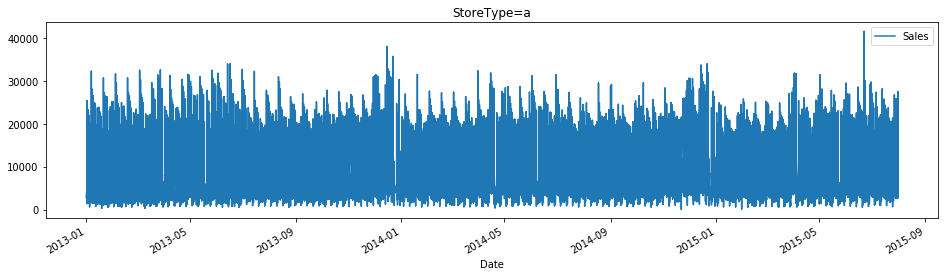

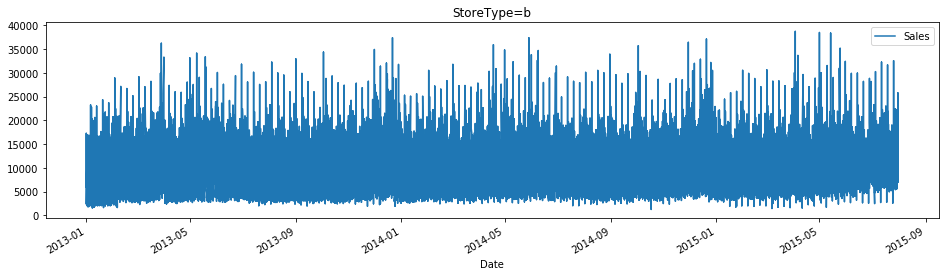

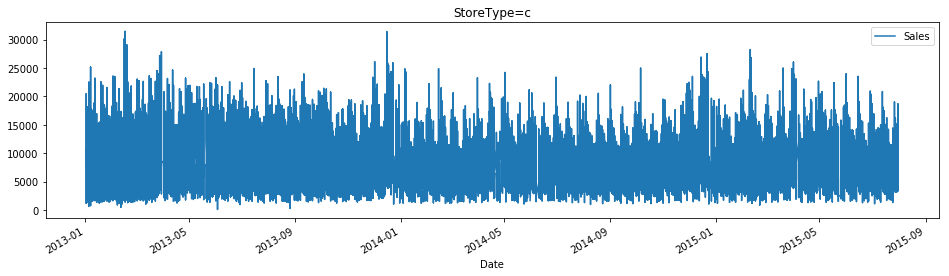

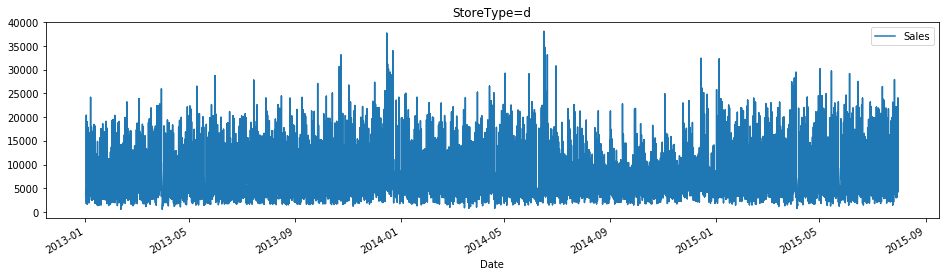

In [19]:
#查看各类型店铺的销售额情况

a_type = train_and_store.loc[train_and_store['StoreType']=='a' ,['Date','Sales']]
b_type = train_and_store.loc[train_and_store['StoreType']=='b' ,['Date','Sales']]
c_type = train_and_store.loc[train_and_store['StoreType']=='c' ,['Date','Sales']]
d_type = train_and_store.loc[train_and_store['StoreType']=='d' ,['Date','Sales']]

a_type.plot(x='Date',y='Sales',title='StoreType=a',figsize=(16,4))
b_type.plot(x='Date',y='Sales',title='StoreType=b',figsize=(16,4))
c_type.plot(x='Date',y='Sales',title='StoreType=c',figsize=(16,4))
d_type.plot(x='Date',y='Sales',title='StoreType=d',figsize=(16,4))


In [20]:
def features_create(data):
    
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) + (data.Month - data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) + (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1

    return data

#(以上代码引用自：https://www.kaggle.com/cast42/xgboost-in-python-with-rmspe-v2/code)

In [21]:
#进行特征制备
features_create(train_and_store)
features_create(test_and_store)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,monthStr,IsPromoMonth
0,1,1,3,2015-09-17,1.0,1,0,0,3,1,...,0.0,,2015,9,17,38,84.0,24189.50,Sept,0
1,857,1,2,2015-09-16,1.0,1,0,0,3,1,...,0.0,,2015,9,16,38,84.0,24189.50,Sept,0
2,1713,1,1,2015-09-15,1.0,1,0,0,3,1,...,0.0,,2015,9,15,38,84.0,24189.50,Sept,0
3,2569,1,0,2015-09-14,1.0,1,0,0,3,1,...,0.0,,2015,9,14,38,84.0,24189.50,Sept,0
4,3425,1,6,2015-09-13,0.0,0,0,0,3,1,...,0.0,,2015,9,13,37,84.0,24189.25,Sept,0
5,4281,1,5,2015-09-12,1.0,0,0,0,3,1,...,0.0,,2015,9,12,37,84.0,24189.25,Sept,0
6,5137,1,4,2015-09-11,1.0,0,0,0,3,1,...,0.0,,2015,9,11,37,84.0,24189.25,Sept,0
7,5993,1,3,2015-09-10,1.0,0,0,0,3,1,...,0.0,,2015,9,10,37,84.0,24189.25,Sept,0
8,6849,1,2,2015-09-09,1.0,0,0,0,3,1,...,0.0,,2015,9,9,37,84.0,24189.25,Sept,0
9,7705,1,1,2015-09-08,1.0,0,0,0,3,1,...,0.0,,2015,9,8,37,84.0,24189.25,Sept,0


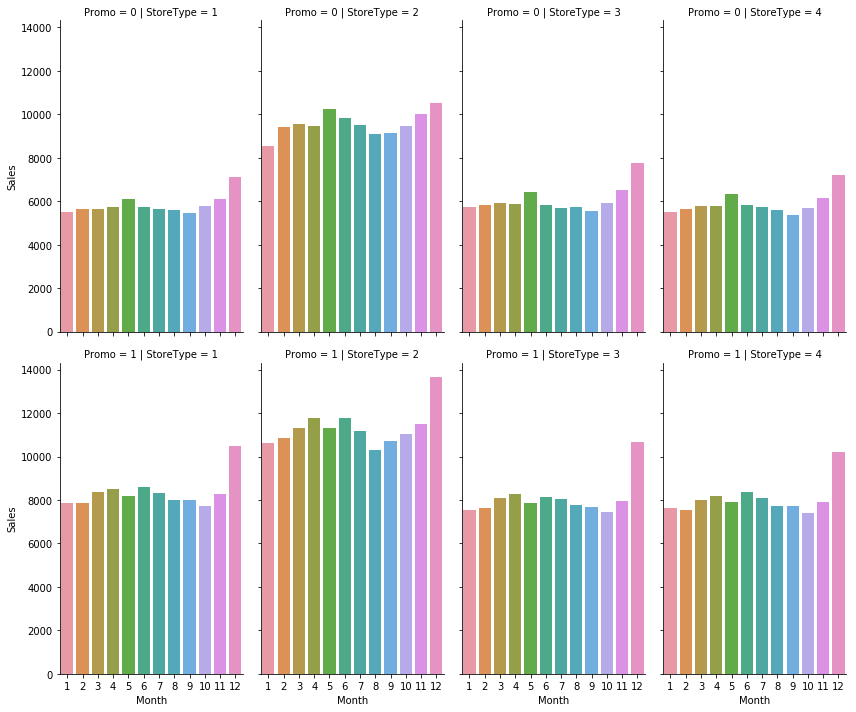

In [22]:
#查看不同类型商店每月的销售情况与Promo的关系

sns.catplot(x="Month", y="Sales",col="StoreType",
            data=train_and_store, saturation=.7,
            row='Promo',kind="bar", ci=None, aspect=.6)

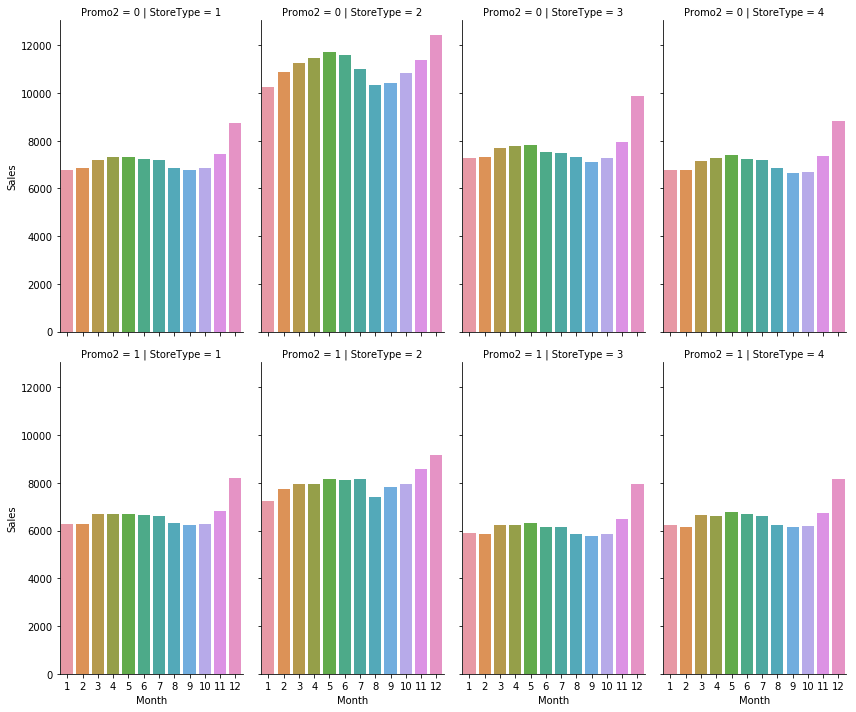

In [23]:
#查看不同类型商店每月的销售情况与Promo2的关系

sns.catplot(x="Month", y="Sales",col="StoreType",
            data=train_and_store, saturation=.7,
            row='Promo2',kind="bar", ci=None, aspect=.6)

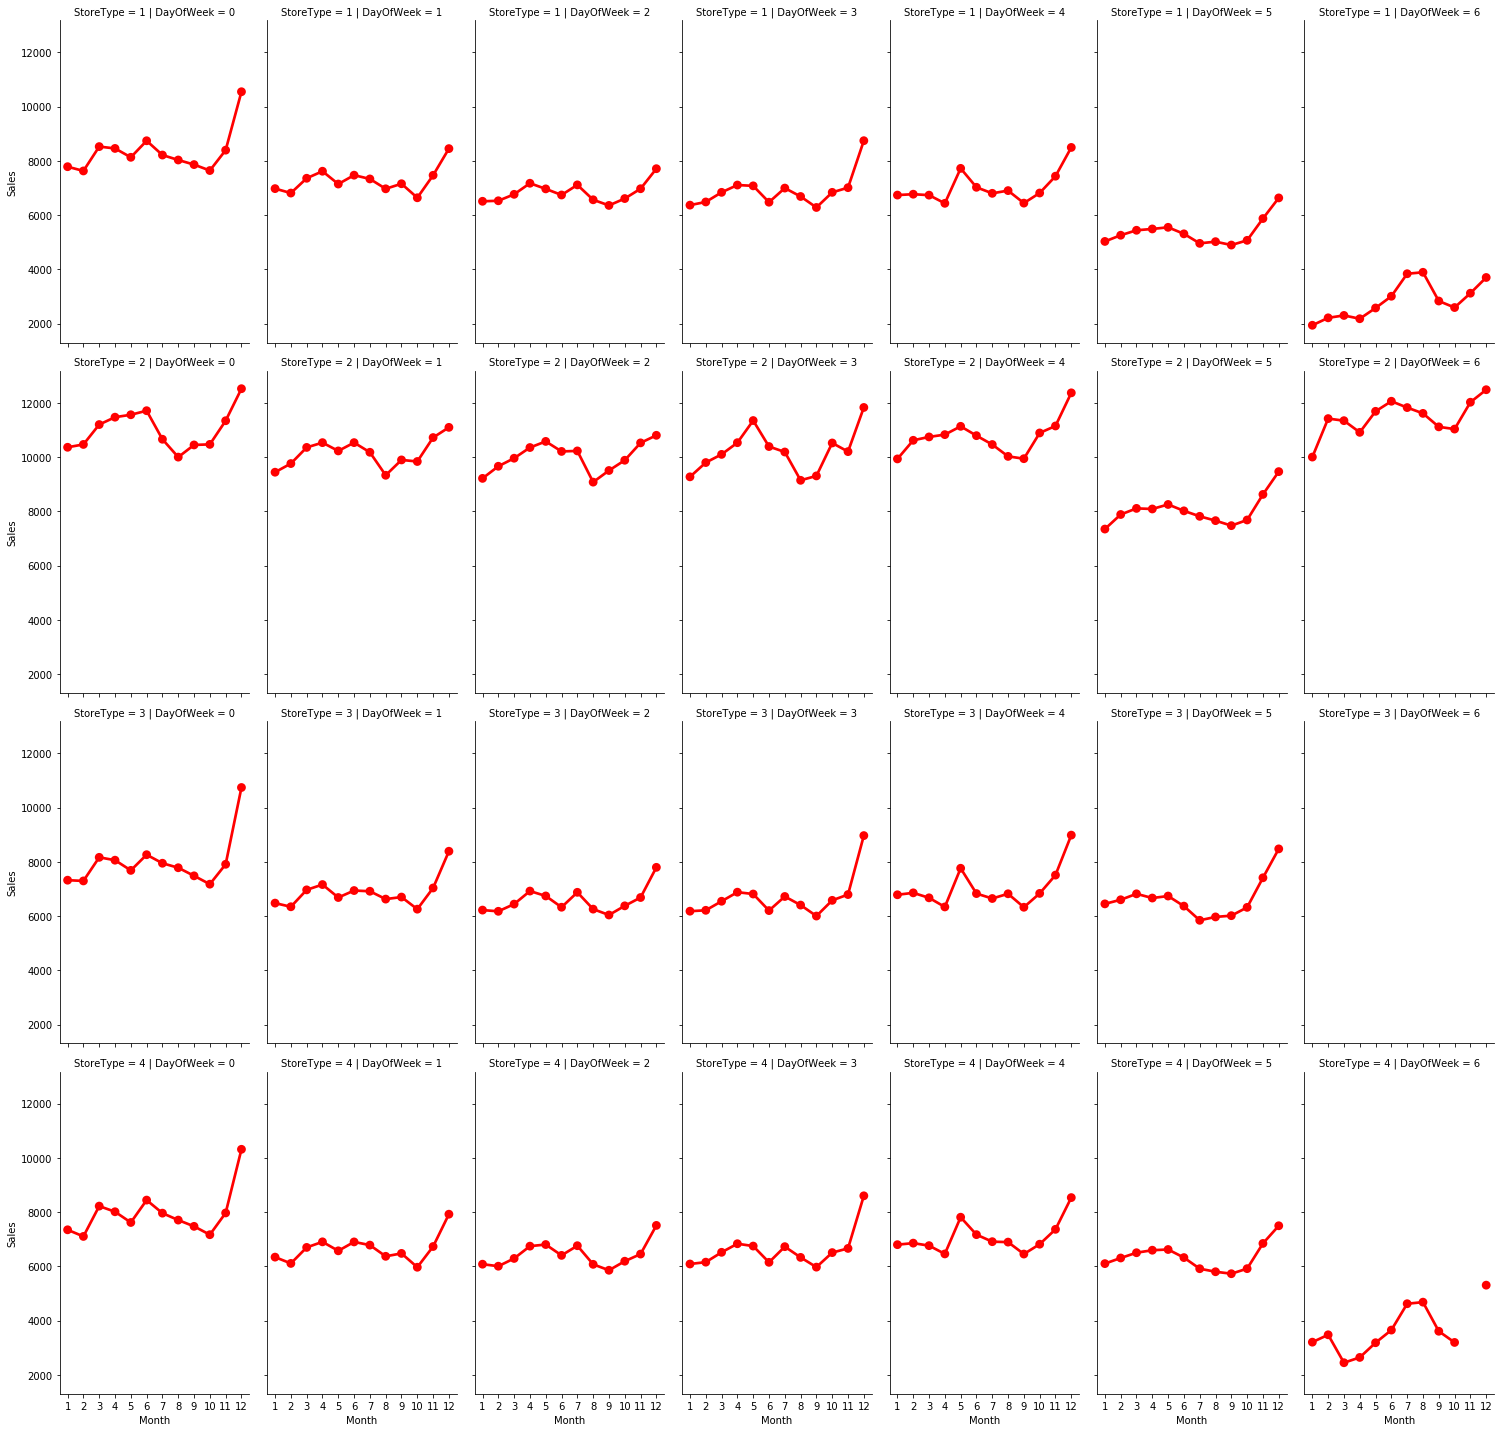

In [24]:
#查看各类型商店在每周不同时间的销售额情况

sns.catplot(x="Month", y="Sales",col="DayOfWeek",
            data=train_and_store, saturation=.7,color='Red',
            row='StoreType',kind="point", ci=None, aspect=.6)

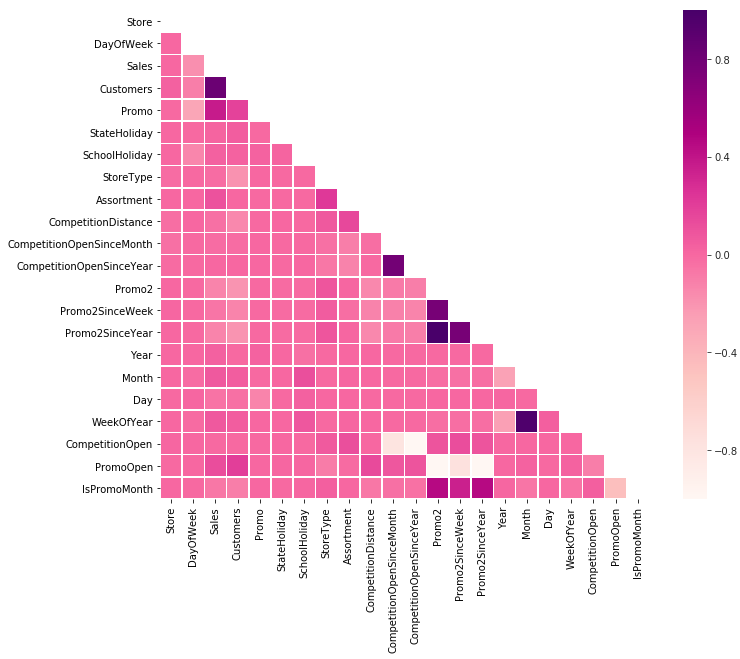

In [25]:
#绘制train_and_store数据集的的heatmap，查看特征间的相互关系
corr = train_and_store.drop('Open', axis = 1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (12, 9))
with sns.axes_style("whitegrid"):
    ax = sns.heatmap(corr, mask=mask, linewidths = .6, square=True, cmap = "RdPu")

# 训练模型

In [26]:
#定义rmspe

def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w


def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe


def rmspe_xg(yhat, y):
    # y = y.values
    y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe

#以上代码引用自：https://www.kaggle.com/paso84/xgboost-in-python-with-rmspe

In [27]:
# 定义标签和特征

features = train_and_store.drop(['Date','Customers','Open','PromoInterval','monthStr','Sales'],axis=1)
labels = np.log1p(train_and_store.Sales)

# 将train_and_store拆分为训练集和验证集
import random
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [28]:
#设定XGboost的参数

params = {'objective': 'reg:linear',
          'booster': 'gbtree',
          'eta': 0.05,
          'max_depth': 10,
          'subsample': 0.8,
          'colsample_bytree': 0.8,
          'silent': 1
          }

num_trees = 1000

dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)
evallist = [(dvalid, 'eval'), (dtrain, 'train')]

#训练模型
gbm = xgb.train(params, dtrain, num_trees, evals=evallist, early_stopping_rounds=10, feval=rmspe_xg, verbose_eval=True)

[0]	eval-rmse:7.85571	train-rmse:7.85624	eval-rmspe:0.999744	train-rmspe:0.999744
Multiple eval metrics have been passed: 'train-rmspe' will be used for early stopping.

Will train until train-rmspe hasn't improved in 10 rounds.
[1]	eval-rmse:7.46367	train-rmse:7.46421	eval-rmspe:0.99954	train-rmspe:0.99954
[2]	eval-rmse:7.09127	train-rmse:7.09183	eval-rmspe:0.999258	train-rmspe:0.999257
[3]	eval-rmse:6.73766	train-rmse:6.73822	eval-rmspe:0.998872	train-rmspe:0.998872
[4]	eval-rmse:6.40164	train-rmse:6.40222	eval-rmspe:0.998357	train-rmspe:0.998356
[5]	eval-rmse:6.08237	train-rmse:6.08298	eval-rmspe:0.997681	train-rmspe:0.99768
[6]	eval-rmse:5.77923	train-rmse:5.77989	eval-rmspe:0.996803	train-rmspe:0.996802
[7]	eval-rmse:5.49123	train-rmse:5.4919	eval-rmspe:0.995687	train-rmspe:0.995686
[8]	eval-rmse:5.21772	train-rmse:5.2184	eval-rmspe:0.994284	train-rmspe:0.994282
[9]	eval-rmse:4.95781	train-rmse:4.95849	eval-rmspe:0.99255	train-rmspe:0.992549
[10]	eval-rmse:4.71094	train-rmse:4.711

[97]	eval-rmse:0.220808	train-rmse:0.2201	eval-rmspe:0.222364	train-rmspe:0.255627
[98]	eval-rmse:0.218977	train-rmse:0.218251	eval-rmspe:0.22141	train-rmspe:0.25489
[99]	eval-rmse:0.217241	train-rmse:0.216499	eval-rmspe:0.22051	train-rmspe:0.254535
[100]	eval-rmse:0.215305	train-rmse:0.214548	eval-rmspe:0.219233	train-rmspe:0.253691
[101]	eval-rmse:0.214134	train-rmse:0.213358	eval-rmspe:0.218828	train-rmspe:0.253466
[102]	eval-rmse:0.21324	train-rmse:0.212425	eval-rmspe:0.218644	train-rmspe:0.253285
[103]	eval-rmse:0.212519	train-rmse:0.211678	eval-rmspe:0.218603	train-rmspe:0.253246
[104]	eval-rmse:0.211421	train-rmse:0.210566	eval-rmspe:0.218141	train-rmspe:0.25312
[105]	eval-rmse:0.210416	train-rmse:0.209518	eval-rmspe:0.217721	train-rmspe:0.250086
[106]	eval-rmse:0.209337	train-rmse:0.208428	eval-rmspe:0.217084	train-rmspe:0.246392
[107]	eval-rmse:0.208095	train-rmse:0.207168	eval-rmspe:0.216304	train-rmspe:0.245747
[108]	eval-rmse:0.206478	train-rmse:0.20555	eval-rmspe:0.215087	

[193]	eval-rmse:0.149391	train-rmse:0.147125	eval-rmspe:0.16314	train-rmspe:0.181937
[194]	eval-rmse:0.149009	train-rmse:0.146733	eval-rmspe:0.162735	train-rmspe:0.181692
[195]	eval-rmse:0.148567	train-rmse:0.146281	eval-rmspe:0.162294	train-rmspe:0.181291
[196]	eval-rmse:0.148424	train-rmse:0.14611	eval-rmspe:0.162152	train-rmspe:0.181122
[197]	eval-rmse:0.147929	train-rmse:0.145596	eval-rmspe:0.161643	train-rmspe:0.18067
[198]	eval-rmse:0.147457	train-rmse:0.145109	eval-rmspe:0.161158	train-rmspe:0.180219
[199]	eval-rmse:0.146727	train-rmse:0.144361	eval-rmspe:0.160364	train-rmspe:0.179511
[200]	eval-rmse:0.146263	train-rmse:0.143888	eval-rmspe:0.159884	train-rmspe:0.17907
[201]	eval-rmse:0.145602	train-rmse:0.143212	eval-rmspe:0.15915	train-rmspe:0.17845
[202]	eval-rmse:0.145162	train-rmse:0.142762	eval-rmspe:0.158683	train-rmspe:0.177999
[203]	eval-rmse:0.144737	train-rmse:0.142326	eval-rmspe:0.158259	train-rmspe:0.17762
[204]	eval-rmse:0.144594	train-rmse:0.142177	eval-rmspe:0.158

[289]	eval-rmse:0.121072	train-rmse:0.117344	eval-rmspe:0.132851	train-rmspe:0.144703
[290]	eval-rmse:0.120859	train-rmse:0.117123	eval-rmspe:0.132613	train-rmspe:0.144487
[291]	eval-rmse:0.120657	train-rmse:0.116903	eval-rmspe:0.132403	train-rmspe:0.144258
[292]	eval-rmse:0.120289	train-rmse:0.116525	eval-rmspe:0.131996	train-rmspe:0.143851
[293]	eval-rmse:0.120118	train-rmse:0.116339	eval-rmspe:0.131817	train-rmspe:0.143674
[294]	eval-rmse:0.120035	train-rmse:0.116247	eval-rmspe:0.131738	train-rmspe:0.143582
[295]	eval-rmse:0.119807	train-rmse:0.116007	eval-rmspe:0.1315	train-rmspe:0.143373
[296]	eval-rmse:0.119732	train-rmse:0.115914	eval-rmspe:0.13142	train-rmspe:0.143272
[297]	eval-rmse:0.119615	train-rmse:0.115787	eval-rmspe:0.131304	train-rmspe:0.14317
[298]	eval-rmse:0.119506	train-rmse:0.115653	eval-rmspe:0.131193	train-rmspe:0.141873
[299]	eval-rmse:0.119263	train-rmse:0.115398	eval-rmspe:0.130921	train-rmspe:0.141595
[300]	eval-rmse:0.119178	train-rmse:0.115289	eval-rmspe:0.

[385]	eval-rmse:0.109309	train-rmse:0.104189	eval-rmspe:0.120471	train-rmspe:0.126515
[386]	eval-rmse:0.109258	train-rmse:0.104132	eval-rmspe:0.120414	train-rmspe:0.126525
[387]	eval-rmse:0.109152	train-rmse:0.104012	eval-rmspe:0.120308	train-rmspe:0.1264
[388]	eval-rmse:0.108942	train-rmse:0.103786	eval-rmspe:0.120084	train-rmspe:0.126185
[389]	eval-rmse:0.108865	train-rmse:0.103704	eval-rmspe:0.120009	train-rmspe:0.126114
[390]	eval-rmse:0.108802	train-rmse:0.103629	eval-rmspe:0.119945	train-rmspe:0.126037
[391]	eval-rmse:0.108568	train-rmse:0.103389	eval-rmspe:0.119692	train-rmspe:0.12581
[392]	eval-rmse:0.10848	train-rmse:0.103278	eval-rmspe:0.119596	train-rmspe:0.125681
[393]	eval-rmse:0.10844	train-rmse:0.103208	eval-rmspe:0.119552	train-rmspe:0.125592
[394]	eval-rmse:0.108388	train-rmse:0.10314	eval-rmspe:0.119499	train-rmspe:0.125437
[395]	eval-rmse:0.108313	train-rmse:0.103057	eval-rmspe:0.119427	train-rmspe:0.12536
[396]	eval-rmse:0.108281	train-rmse:0.103019	eval-rmspe:0.119

[481]	eval-rmse:0.102448	train-rmse:0.095908	eval-rmspe:0.113325	train-rmspe:0.116773
[482]	eval-rmse:0.10234	train-rmse:0.095787	eval-rmspe:0.113214	train-rmspe:0.116664
[483]	eval-rmse:0.102304	train-rmse:0.095738	eval-rmspe:0.113179	train-rmspe:0.116615
[484]	eval-rmse:0.102243	train-rmse:0.095668	eval-rmspe:0.113119	train-rmspe:0.116543
[485]	eval-rmse:0.102197	train-rmse:0.09561	eval-rmspe:0.113078	train-rmspe:0.116477
[486]	eval-rmse:0.10218	train-rmse:0.095584	eval-rmspe:0.113063	train-rmspe:0.116455
[487]	eval-rmse:0.102105	train-rmse:0.095494	eval-rmspe:0.112991	train-rmspe:0.116342
[488]	eval-rmse:0.102082	train-rmse:0.095463	eval-rmspe:0.112972	train-rmspe:0.116316
[489]	eval-rmse:0.102031	train-rmse:0.095404	eval-rmspe:0.112923	train-rmspe:0.116257
[490]	eval-rmse:0.101952	train-rmse:0.095313	eval-rmspe:0.112845	train-rmspe:0.116136
[491]	eval-rmse:0.101883	train-rmse:0.095221	eval-rmspe:0.112778	train-rmspe:0.116031
[492]	eval-rmse:0.101846	train-rmse:0.095173	eval-rmspe:0

[577]	eval-rmse:0.098178	train-rmse:0.090222	eval-rmspe:0.108953	train-rmspe:0.107964
[578]	eval-rmse:0.098147	train-rmse:0.090148	eval-rmspe:0.108893	train-rmspe:0.107638
[579]	eval-rmse:0.09813	train-rmse:0.090086	eval-rmspe:0.108867	train-rmspe:0.107482
[580]	eval-rmse:0.098113	train-rmse:0.090061	eval-rmspe:0.108845	train-rmspe:0.107192
[581]	eval-rmse:0.098096	train-rmse:0.090033	eval-rmspe:0.108826	train-rmspe:0.107163
[582]	eval-rmse:0.098074	train-rmse:0.089994	eval-rmspe:0.108808	train-rmspe:0.107116
[583]	eval-rmse:0.098042	train-rmse:0.08995	eval-rmspe:0.108773	train-rmspe:0.10706
[584]	eval-rmse:0.098031	train-rmse:0.089931	eval-rmspe:0.108764	train-rmspe:0.107038
[585]	eval-rmse:0.098	train-rmse:0.089888	eval-rmspe:0.108733	train-rmspe:0.106989
[586]	eval-rmse:0.097962	train-rmse:0.089836	eval-rmspe:0.108698	train-rmspe:0.10694
[587]	eval-rmse:0.097932	train-rmse:0.089793	eval-rmspe:0.10867	train-rmspe:0.106893
[588]	eval-rmse:0.097905	train-rmse:0.089752	eval-rmspe:0.1086

[673]	eval-rmse:0.095426	train-rmse:0.086062	eval-rmspe:0.106128	train-rmspe:0.100796
[674]	eval-rmse:0.095416	train-rmse:0.086045	eval-rmspe:0.106119	train-rmspe:0.10078
[675]	eval-rmse:0.095379	train-rmse:0.085992	eval-rmspe:0.106087	train-rmspe:0.100726
[676]	eval-rmse:0.095359	train-rmse:0.085962	eval-rmspe:0.106067	train-rmspe:0.100684
[677]	eval-rmse:0.09534	train-rmse:0.085933	eval-rmspe:0.106046	train-rmspe:0.100653
[678]	eval-rmse:0.095315	train-rmse:0.085885	eval-rmspe:0.106022	train-rmspe:0.100598
[679]	eval-rmse:0.095305	train-rmse:0.085857	eval-rmspe:0.106008	train-rmspe:0.100551
[680]	eval-rmse:0.095295	train-rmse:0.085837	eval-rmspe:0.105999	train-rmspe:0.100526
[681]	eval-rmse:0.095272	train-rmse:0.085776	eval-rmspe:0.105949	train-rmspe:0.100385
[682]	eval-rmse:0.095247	train-rmse:0.085741	eval-rmspe:0.105921	train-rmspe:0.100353
[683]	eval-rmse:0.095231	train-rmse:0.085695	eval-rmspe:0.105895	train-rmspe:0.10013
[684]	eval-rmse:0.095216	train-rmse:0.085669	eval-rmspe:0

[769]	eval-rmse:0.093589	train-rmse:0.082837	eval-rmspe:0.104275	train-rmspe:0.094678
[770]	eval-rmse:0.093572	train-rmse:0.082807	eval-rmspe:0.104257	train-rmspe:0.094638
[771]	eval-rmse:0.093564	train-rmse:0.082788	eval-rmspe:0.10425	train-rmspe:0.09462
[772]	eval-rmse:0.09355	train-rmse:0.082764	eval-rmspe:0.104237	train-rmspe:0.094597
[773]	eval-rmse:0.093535	train-rmse:0.082735	eval-rmspe:0.104218	train-rmspe:0.094551
[774]	eval-rmse:0.093505	train-rmse:0.082678	eval-rmspe:0.104181	train-rmspe:0.094466
[775]	eval-rmse:0.093472	train-rmse:0.082626	eval-rmspe:0.104151	train-rmspe:0.094341
[776]	eval-rmse:0.093455	train-rmse:0.082595	eval-rmspe:0.104137	train-rmspe:0.094293
[777]	eval-rmse:0.093435	train-rmse:0.082558	eval-rmspe:0.10412	train-rmspe:0.094255
[778]	eval-rmse:0.093412	train-rmse:0.082519	eval-rmspe:0.104105	train-rmspe:0.094215
[779]	eval-rmse:0.093392	train-rmse:0.082489	eval-rmspe:0.104086	train-rmspe:0.094174
[780]	eval-rmse:0.093353	train-rmse:0.082436	eval-rmspe:0.

[865]	eval-rmse:0.092029	train-rmse:0.079957	eval-rmspe:0.102719	train-rmspe:0.08978
[866]	eval-rmse:0.092013	train-rmse:0.07992	eval-rmspe:0.102704	train-rmspe:0.089393
[867]	eval-rmse:0.092002	train-rmse:0.079895	eval-rmspe:0.102694	train-rmspe:0.089366
[868]	eval-rmse:0.09199	train-rmse:0.079869	eval-rmspe:0.102683	train-rmspe:0.089338
[869]	eval-rmse:0.091974	train-rmse:0.079834	eval-rmspe:0.102667	train-rmspe:0.089192
[870]	eval-rmse:0.091968	train-rmse:0.07982	eval-rmspe:0.102664	train-rmspe:0.08918
[871]	eval-rmse:0.091958	train-rmse:0.079799	eval-rmspe:0.102656	train-rmspe:0.089154
[872]	eval-rmse:0.091931	train-rmse:0.079752	eval-rmspe:0.10262	train-rmspe:0.089097
[873]	eval-rmse:0.091917	train-rmse:0.079726	eval-rmspe:0.102609	train-rmspe:0.089068
[874]	eval-rmse:0.091898	train-rmse:0.079695	eval-rmspe:0.102592	train-rmspe:0.089038
[875]	eval-rmse:0.091887	train-rmse:0.079676	eval-rmspe:0.10258	train-rmspe:0.089019
[876]	eval-rmse:0.091879	train-rmse:0.079659	eval-rmspe:0.102

[961]	eval-rmse:0.090958	train-rmse:0.077666	eval-rmspe:0.101623	train-rmspe:0.085964
[962]	eval-rmse:0.090951	train-rmse:0.077646	eval-rmspe:0.101616	train-rmspe:0.085942
[963]	eval-rmse:0.090944	train-rmse:0.077633	eval-rmspe:0.101607	train-rmspe:0.085926
[964]	eval-rmse:0.090934	train-rmse:0.077616	eval-rmspe:0.101597	train-rmspe:0.085866
[965]	eval-rmse:0.090929	train-rmse:0.077599	eval-rmspe:0.101598	train-rmspe:0.085846
[966]	eval-rmse:0.090918	train-rmse:0.077578	eval-rmspe:0.101589	train-rmspe:0.085809
[967]	eval-rmse:0.090913	train-rmse:0.077562	eval-rmspe:0.101584	train-rmspe:0.085791
[968]	eval-rmse:0.090896	train-rmse:0.077533	eval-rmspe:0.101566	train-rmspe:0.085721
[969]	eval-rmse:0.090872	train-rmse:0.0775	eval-rmspe:0.101541	train-rmspe:0.085687
[970]	eval-rmse:0.090844	train-rmse:0.077461	eval-rmspe:0.101517	train-rmspe:0.085646
[971]	eval-rmse:0.090834	train-rmse:0.077436	eval-rmspe:0.101506	train-rmspe:0.085618
[972]	eval-rmse:0.090829	train-rmse:0.077419	eval-rmspe:

In [30]:
#检验模型的预测效果

yhat = gbm.predict(xgb.DMatrix(X_test))
error = rmspe(np.expm1(y_test), np.expm1(yhat))

print('The rmspe is {:.6f}.'.format(error))

The rmspe is 0.090415.


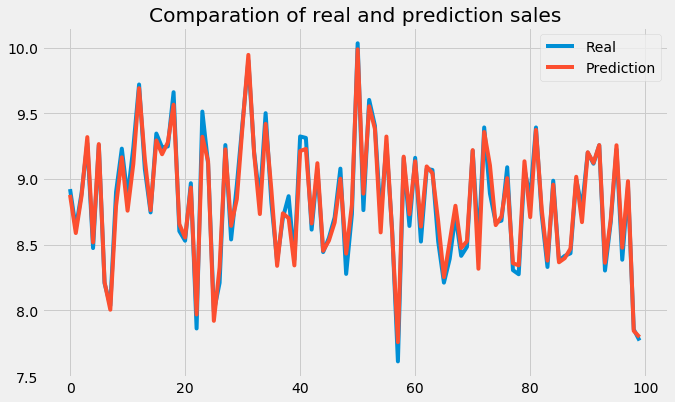

In [86]:
#将预测值与真实值进行对比
y_and_yhat = pd.DataFrame(y_test)
y_and_yhat['Prediction']=yhat
y_and_yhat = pd.merge(X_test, y_and_yhat, left_index= True, right_index=True)

sample = y_and_yhat.sample(n=100)

plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
plt.xlabel = 'Sales'
plt.title('Comparation of real and prediction sales')
x = range(len(sample))
plt.plot(x,sample['Sales'],label='Real')
plt.plot(x,sample['Prediction'],label='Prediction')
plt.legend()
plt.grid(True)

In [32]:
#对X_test进行多次预测验证模型健壮性

import warnings
warnings.filterwarnings('ignore')

#多次运行测试结果
print ("Error Results\n------")
for i in range(10):
    yhat = gbm.predict(xgb.DMatrix(X_test))
    error = rmspe(np.expm1(y_test), np.expm1(yhat))
    print ("The No.{} time error result for the X_test is: {} ".format(i+1, error))

Error Results
------
The No.1 time error result for the X_test is: 0.09041482589671332 
The No.2 time error result for the X_test is: 0.09041482589671332 
The No.3 time error result for the X_test is: 0.09041482589671332 
The No.4 time error result for the X_test is: 0.09041482589671332 
The No.5 time error result for the X_test is: 0.09041482589671332 
The No.6 time error result for the X_test is: 0.09041482589671332 
The No.7 time error result for the X_test is: 0.09041482589671332 
The No.8 time error result for the X_test is: 0.09041482589671332 
The No.9 time error result for the X_test is: 0.09041482589671332 
The No.10 time error result for the X_test is: 0.09041482589671332 


In [33]:
#对test_and_store进行预测
features = test_and_store.drop(['Id','Date','Open','PromoInterval','monthStr'],axis=1)
dtest = xgb.DMatrix(features)
test_probs = gbm.predict(dtest)

#输出"submission.csv"文件
submission = pd.DataFrame({'Id': test_and_store['Id'], 'Sales': np.expm1(test_probs)})
submission.to_csv('Rossmann_Sales_submission.csv', index=False)